In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 500
plt.rcParams['text.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.edgecolor'] = 'w'
plt.rcParams['figure.facecolor'] = 'k'
plt.rcParams['axes.facecolor'] = 'k'
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LogNorm
from matplotlib.patches import FancyArrowPatch
import matplotlib.colors as colors
from astropy.visualization import SqrtStretch, LinearStretch, LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import pandas as pd
import re
from astropy.io import fits
import os
from scipy.ndimage import map_coordinates
from scipy.stats import binned_statistic
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from pathlib import Path
from scipy.stats import gaussian_kde
import seaborn as sns

from matplotlib.lines import Line2D
os.chdir("/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling")

In [23]:
m = 0.31
n = 200.0
o = 0.5

model_path = '/Volumes/ASTRO/Sim 4'
model_ver = 'SIE_POS_SHEAR_' + str(m) + '_' + str(n) + '_' + str(o)  + '_lens.fits'

hdu_list = fits.open(model_path + '/' + model_ver)
hdu_list.info()

# Extract kappa 
alpha_x = hdu_list[0].data[0]
alpha_x = np.array(alpha_x)

Filename: /Volumes/ASTRO/Sim 4/SIE_POS_SHEAR_0.31_200.0_0.5_lens.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (156, 156, 8)   float32   


In [24]:
height, width = alpha_x.shape
center = (width // 2, height // 2)
end = (width, height//2)

alpha_radial_sim = alpha_x[center[1], center[0]:end[0]]

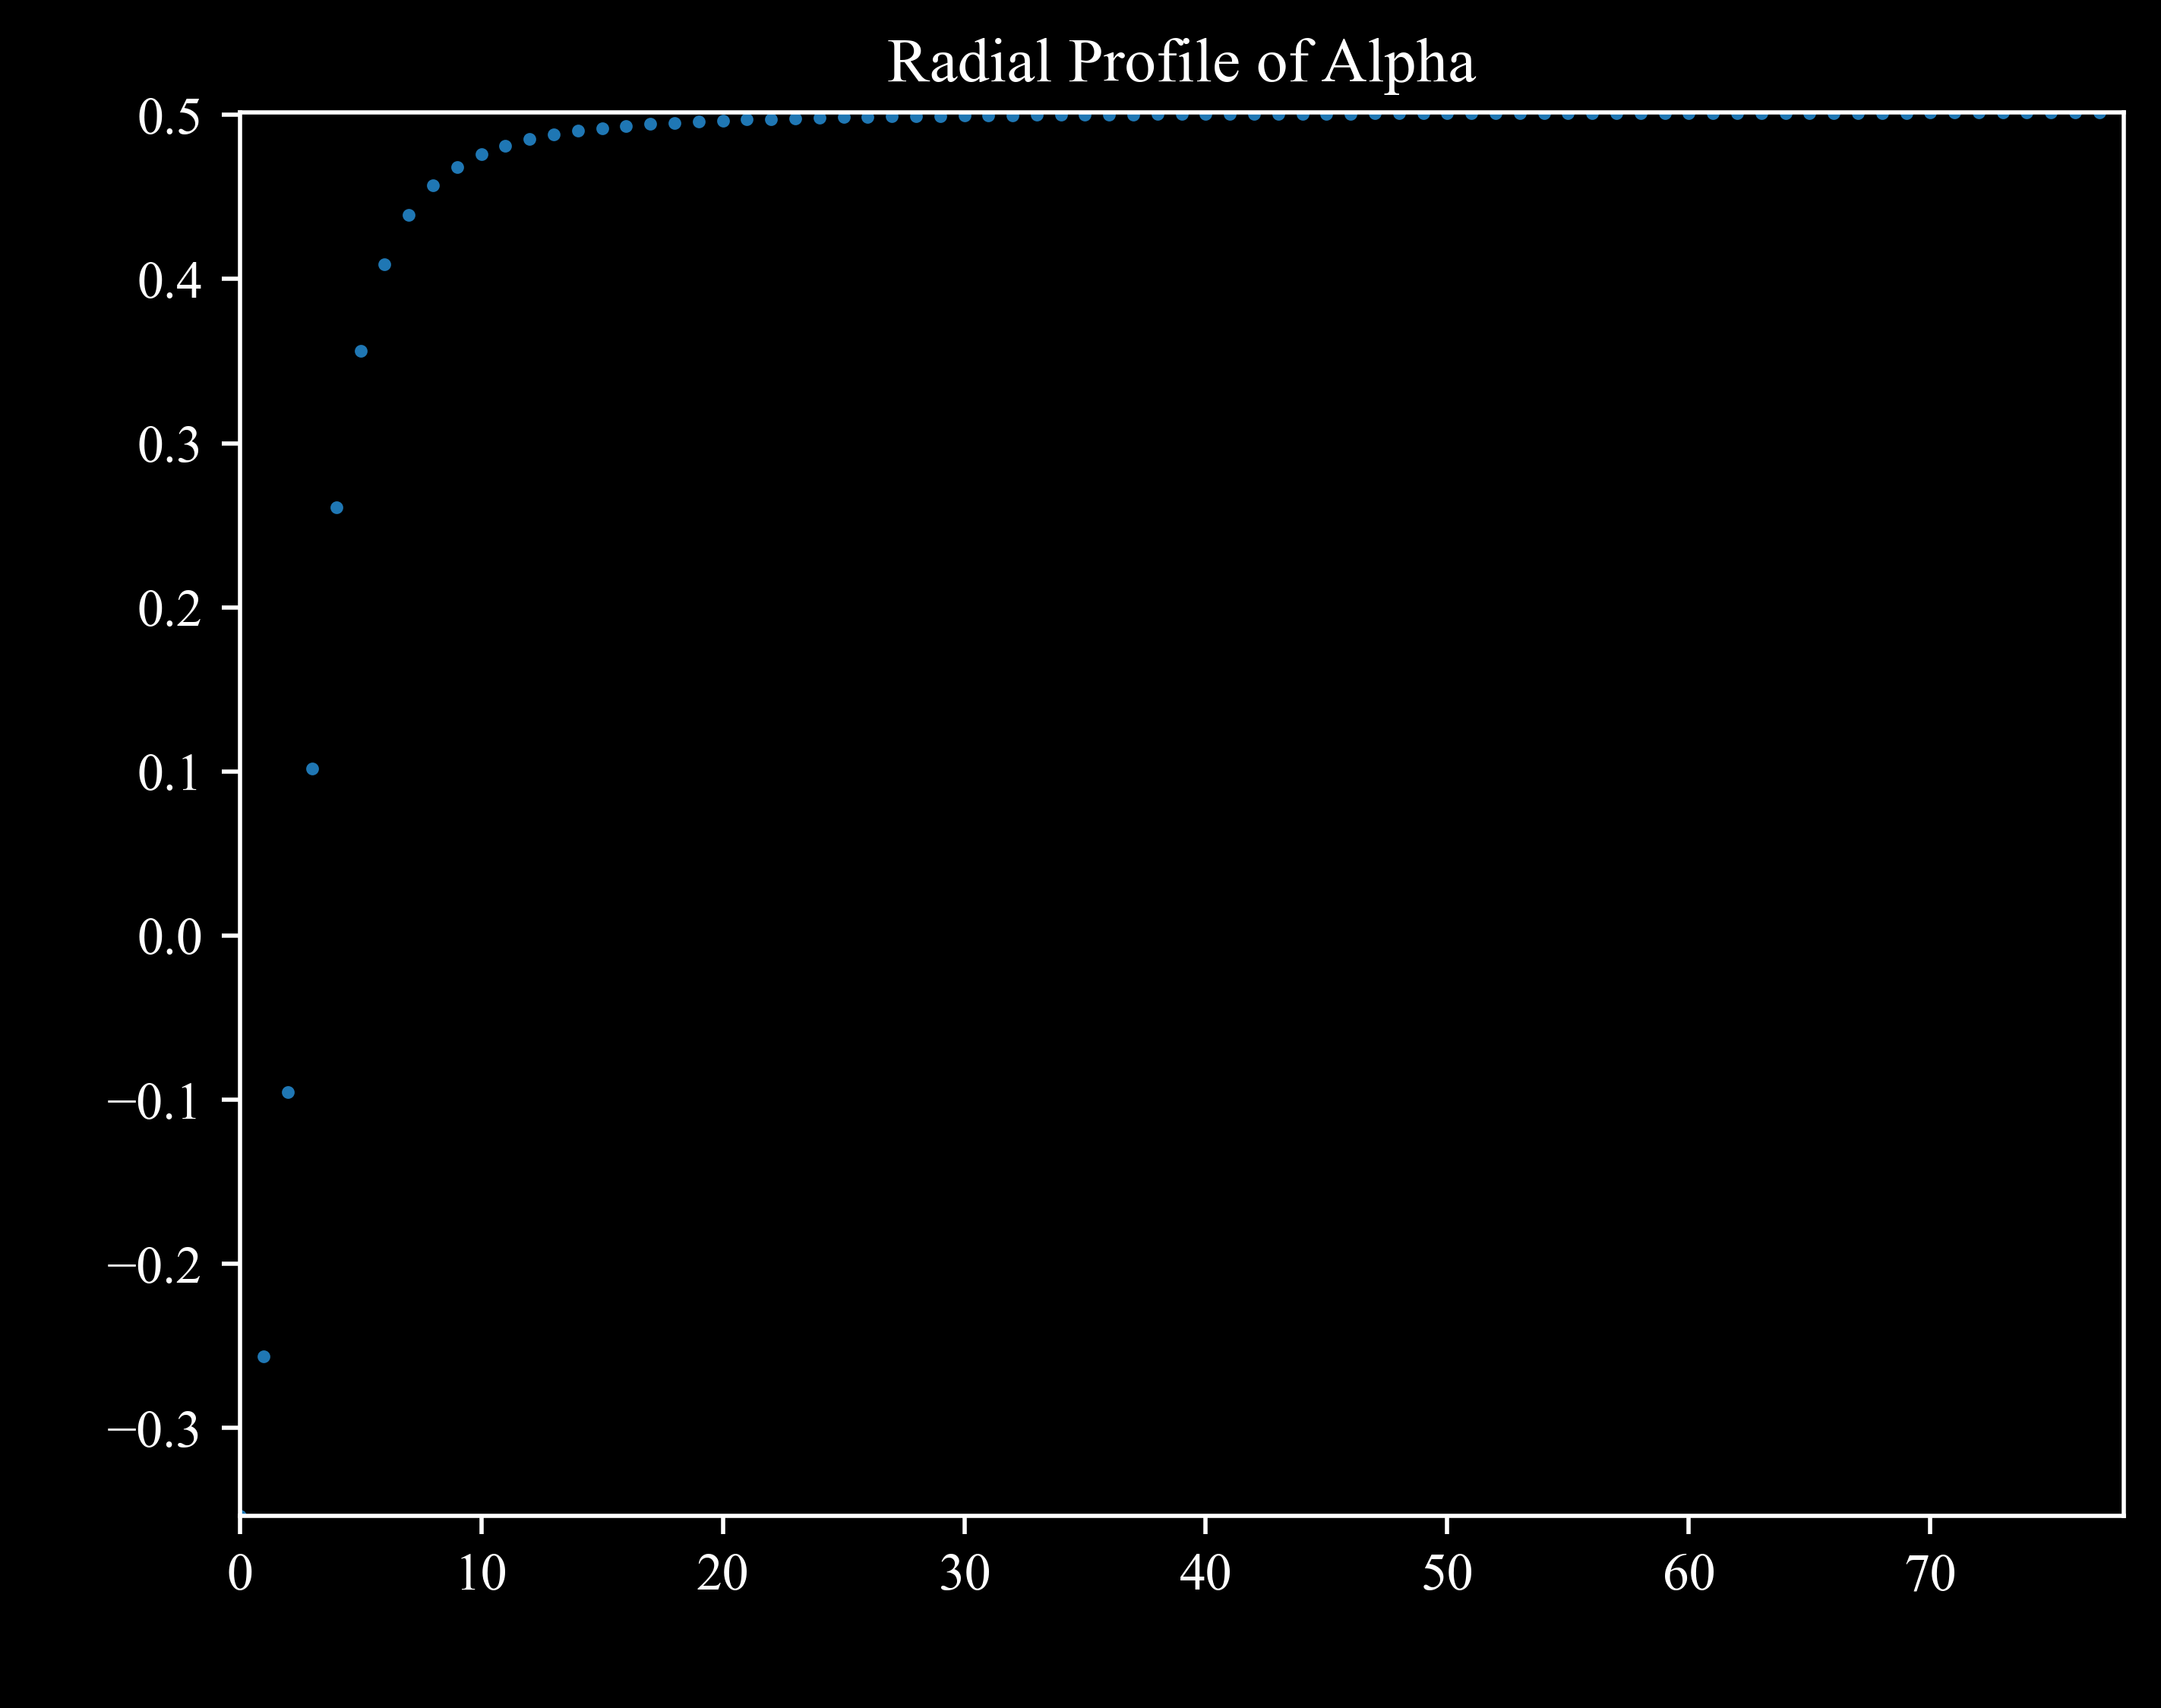

In [25]:
plt.scatter(np.arange(len(alpha_radial)), alpha_radial, s=2)
plt.xlabel('Radius (pixels)')
plt.ylabel('Alpha (arcsec)')
plt.title('Radial Profile of Alpha')
plt.xlim(0, len(alpha_radial))
plt.ylim(np.min(alpha_radial), np.max(alpha_radial))
plt.show()

In [33]:
model_path = '/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling/SIE+SHEAR'
model_ver = 'SIE_POS_SHEAR_lens.fits'

hdu_list = fits.open(model_path + '/' + model_ver)
hdu_list.info()

# Extract kappa 
alpha_x = hdu_list[0].data[0]
alpha_x = np.array(alpha_x)

Filename: /Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling/SIE+SHEAR/SIE_POS_SHEAR_lens.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (156, 156, 8)   float32   


In [34]:
height, width = alpha_x.shape
center = (width // 2, height // 2)
end = (width, height//2)

alpha_radial = alpha_x[center[1], center[0]:end[0]]

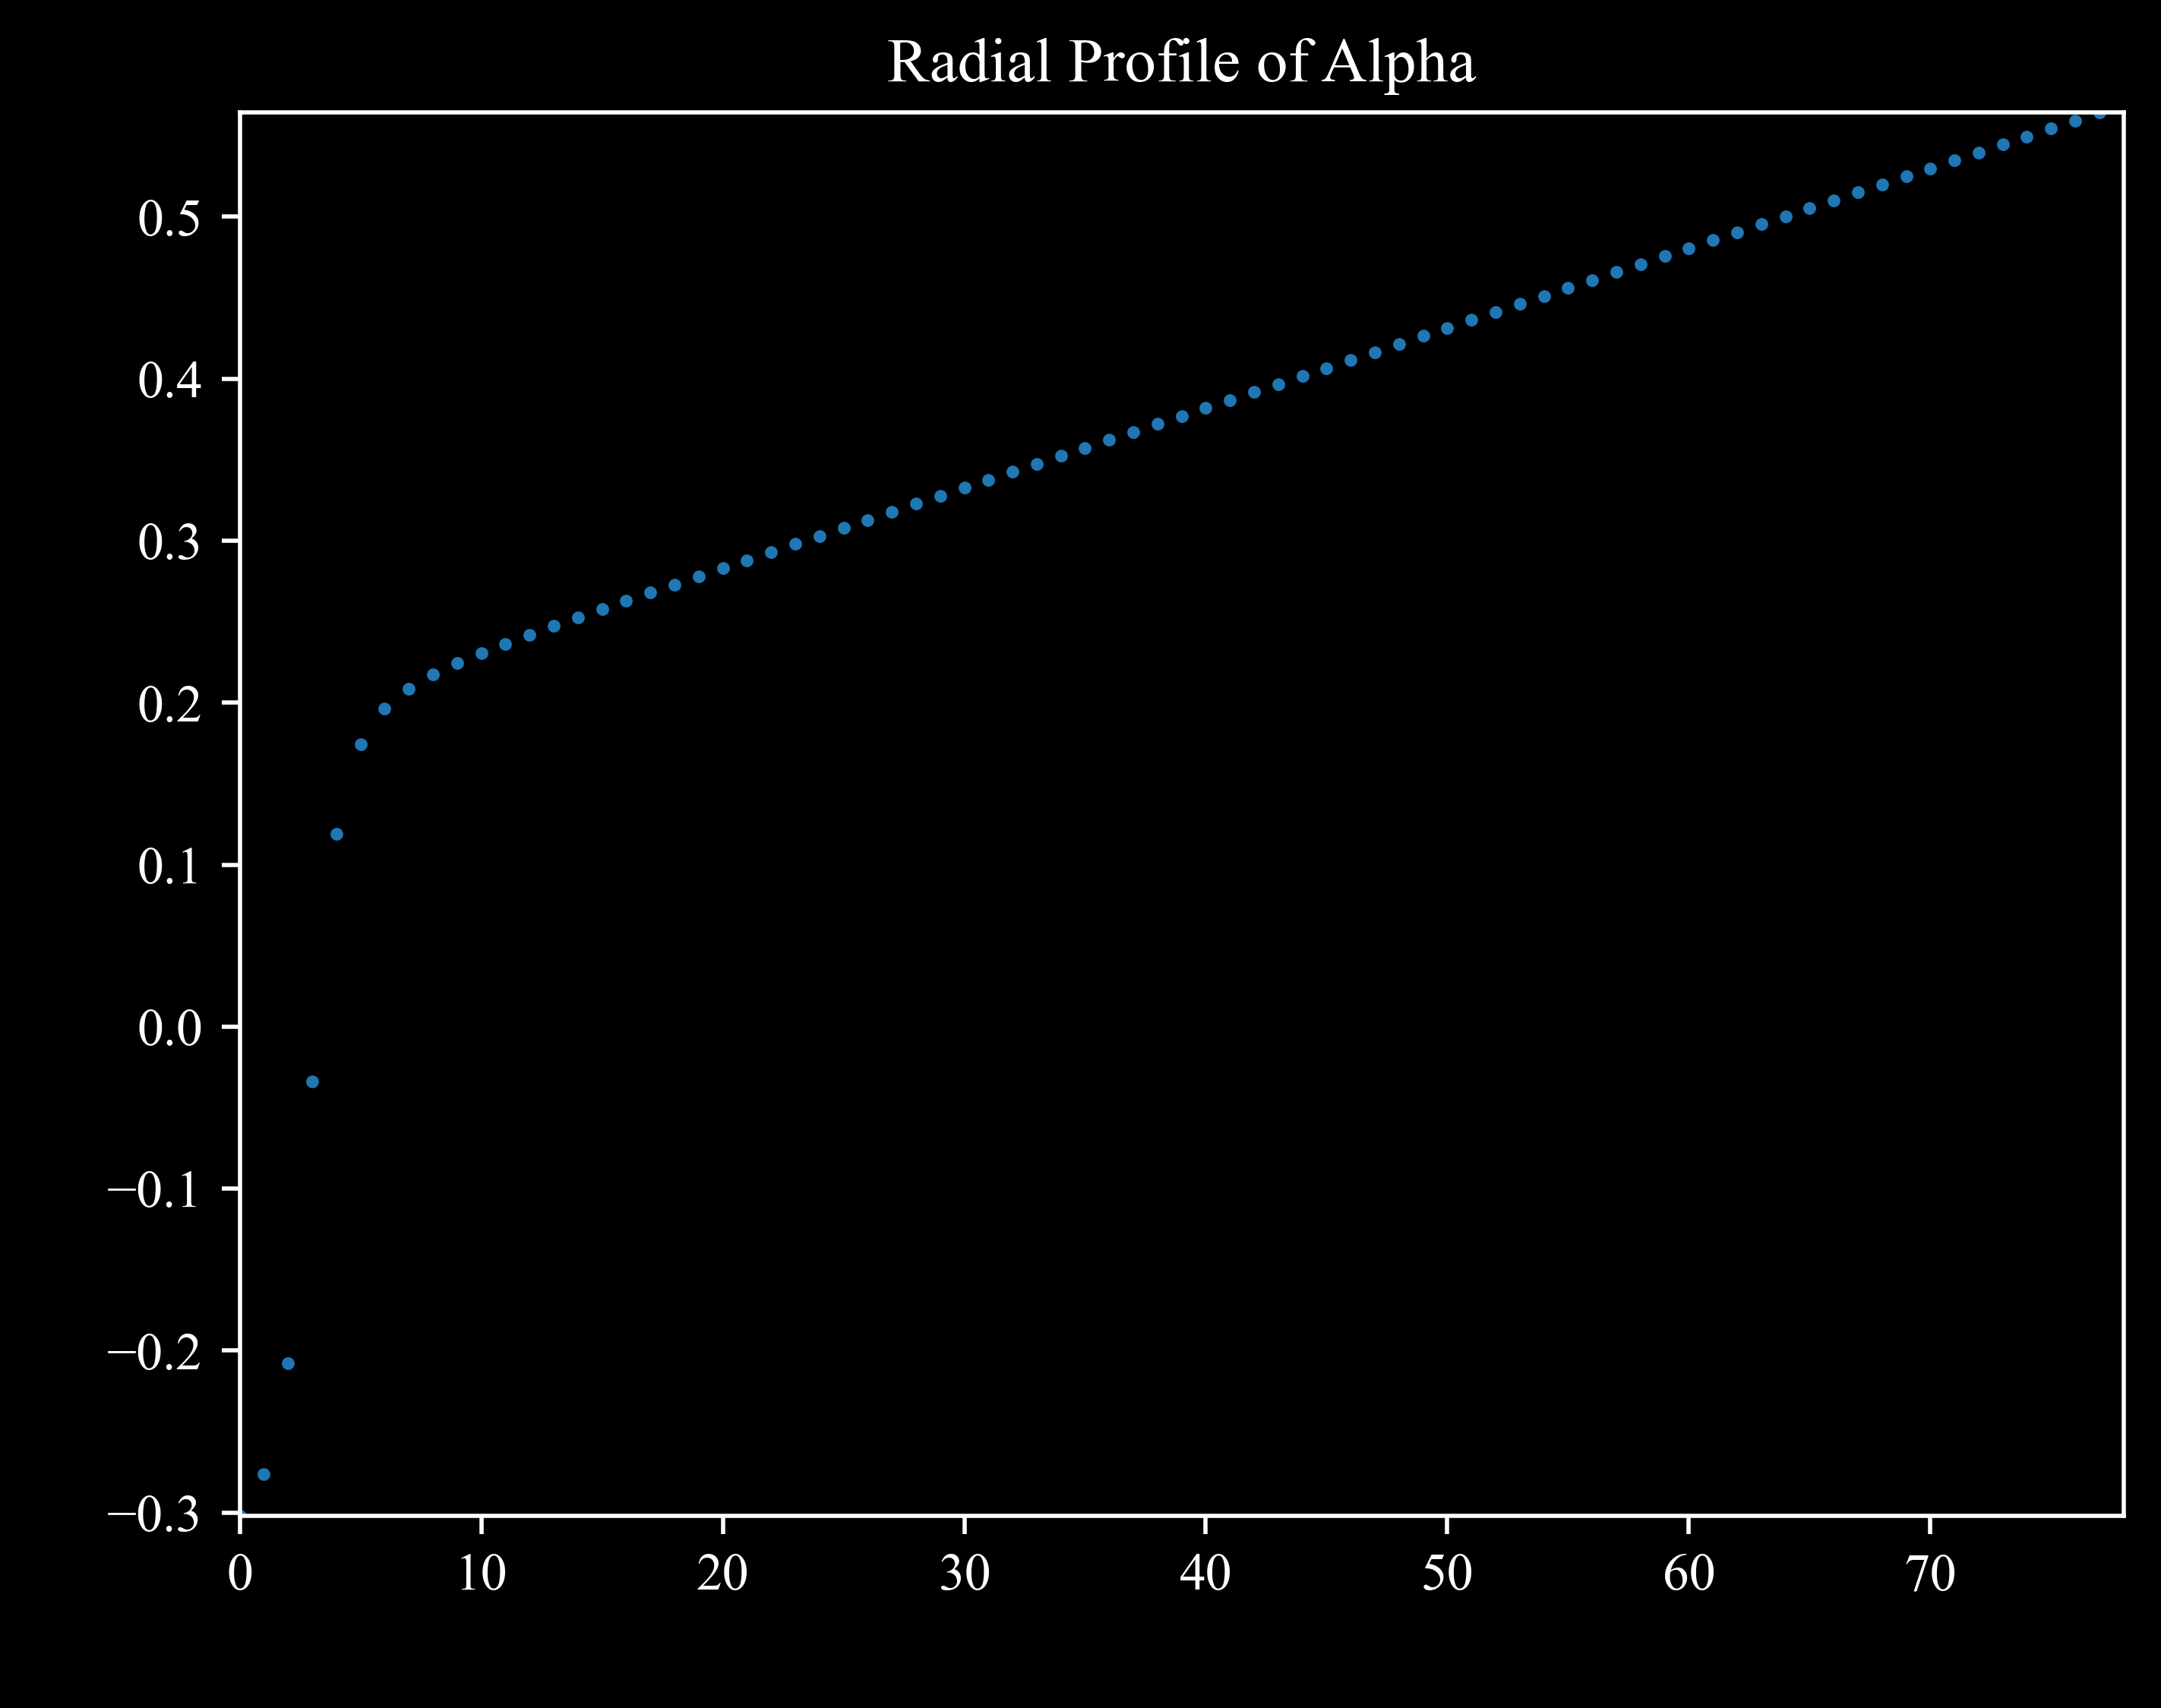

In [35]:
plt.scatter(np.arange(len(alpha_radial)), alpha_radial, s=2)
plt.xlabel('Radius (pixels)')
plt.ylabel('Alpha (arcsec)')
plt.title('Radial Profile of Alpha')
plt.xlim(0, len(alpha_radial))
plt.ylim(np.min(alpha_radial), np.max(alpha_radial))
plt.show()

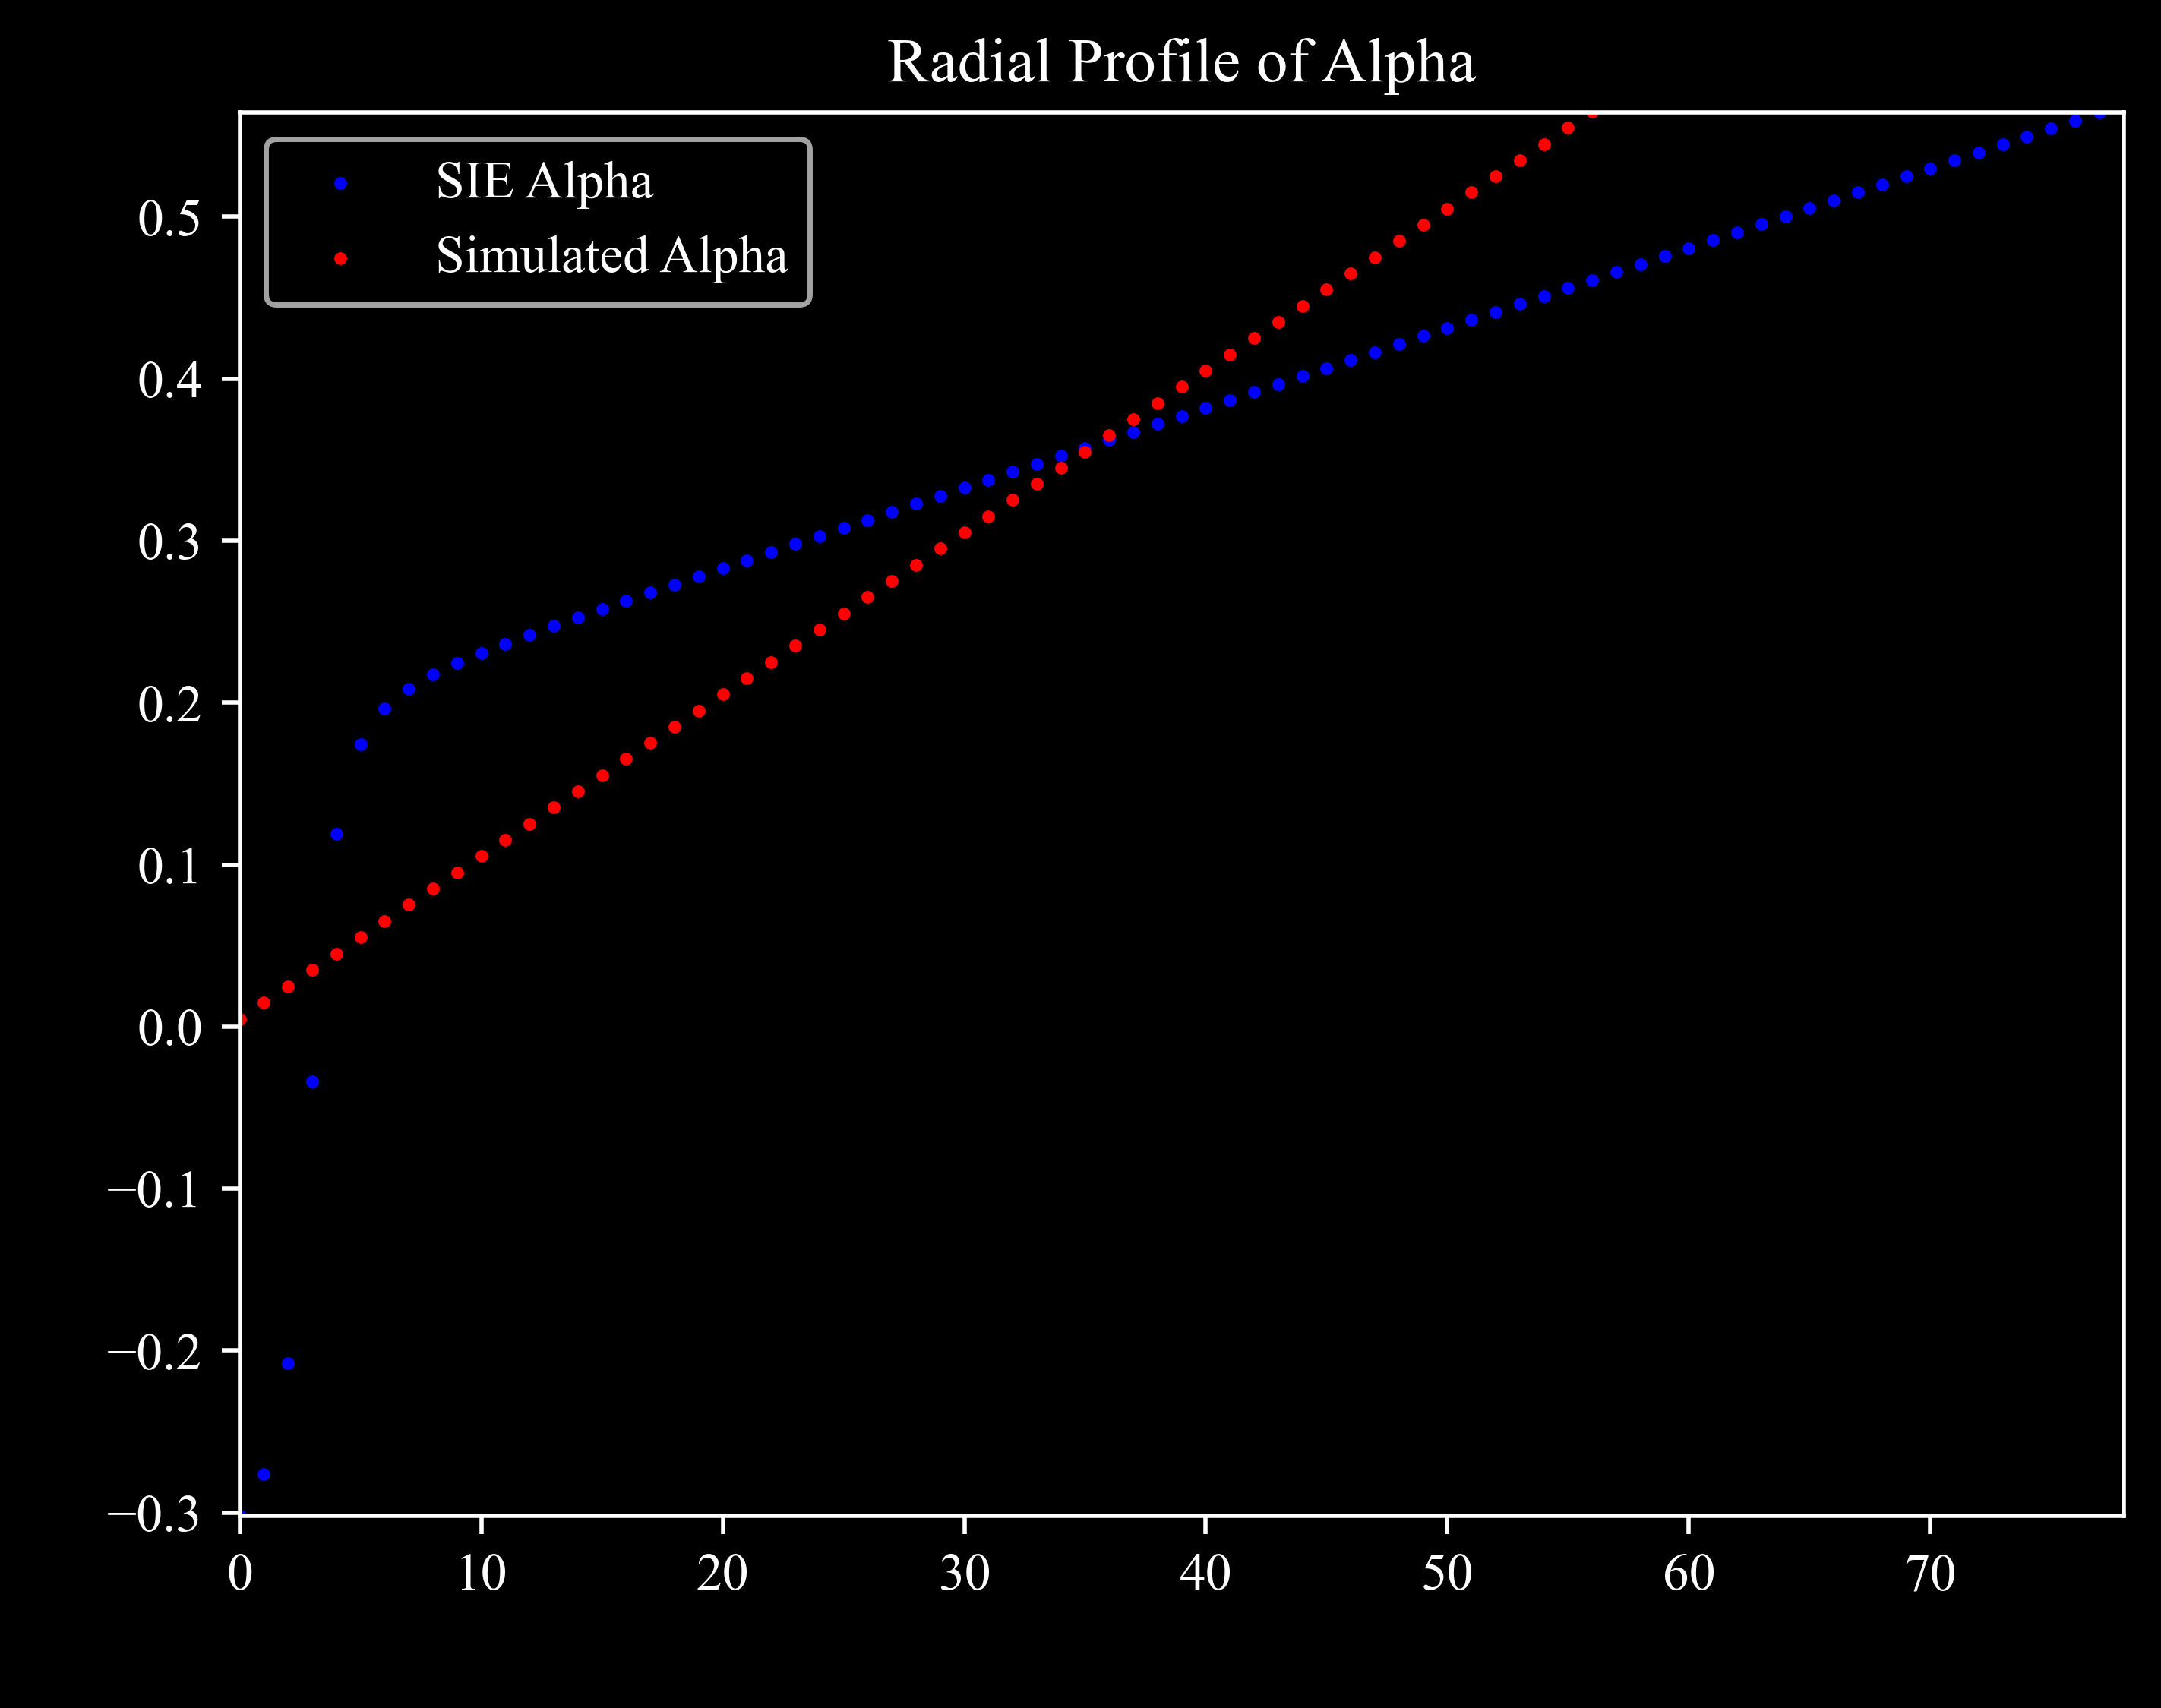

In [36]:
plt.scatter(np.arange(len(alpha_radial)), alpha_radial, s=2, color='b', label='SIE Alpha')
plt.scatter(np.arange(len(alpha_radial_sim)), alpha_radial_sim, s=2, color='r', label='Simulated Alpha')
plt.xlabel('Radius (pixels)')
plt.ylabel('Alpha (arcsec)')
plt.title('Radial Profile of Alpha')
plt.xlim(0, len(alpha_radial))
plt.ylim(np.min(alpha_radial), np.max(alpha_radial))
plt.legend()
plt.show()